# Zomato Data Analysis Project

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
dataframe=pd.read_csv("Zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [28]:
dataframe

name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          Buffet  
3                            300          Buffet  
4                            600          Buffet  
..                           ...             ...  
143                          100          Dining  
144                          150          Dining  
145                          450          Dining  
146                          800          Dining  
147                          200          Dining  

[148 rows x 7 columns]

In [40]:
#convert the datatype of column- Rate
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [44]:
# to check any missing value
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Visualisation
# Q1. What type of restaurant do the majority of customers order from?




Text(0.5, 0, 'type of restaurant')

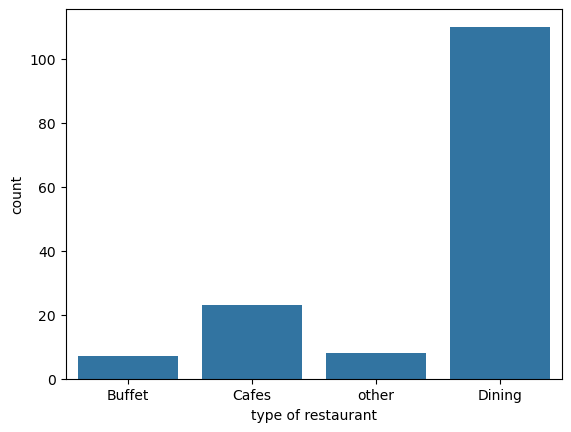

In [53]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of restaurant")

Conclusion:- dining type of restaurant gets the majority number of orders

# Q2. How many votes has each type of restaurant received from customers?



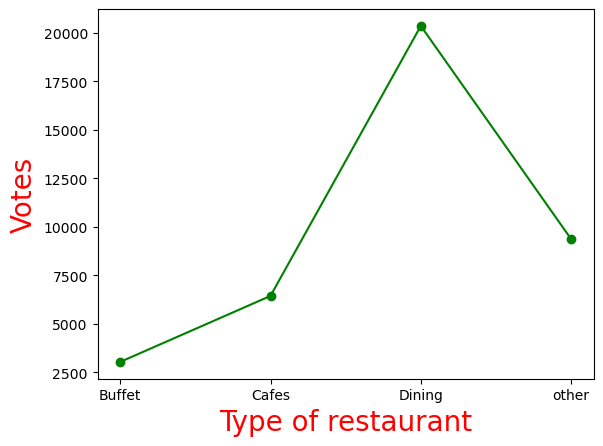

In [76]:

# Group the data and sum the votes
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()

# Create a DataFrame from the grouped data
result = pd.DataFrame({'votes': grouped_data})

# Plot the result with correct color and marker
plt.plot(result, color="green", marker="o")  # Corrected the marker and color argument

# Set the x and y labels with correct parameters
plt.xlabel("Type of restaurant", color="red", size=20)
plt.ylabel("Votes", color="red", size=20)

# Show the plot
plt.show()


#Conclusion:- Dining restaurant has received maximum votes

# Q3. What are the ratings that majority of restaurant have received?

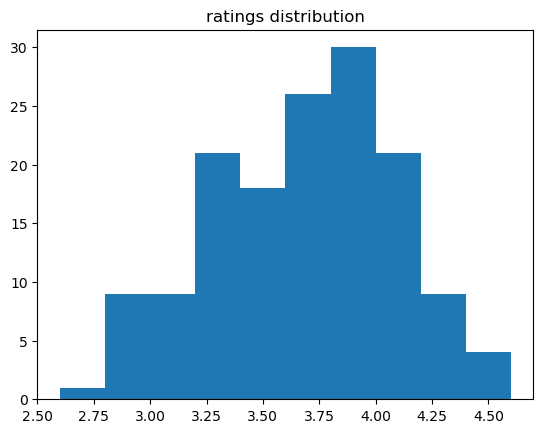

In [84]:
plt.hist(dataframe['rate'],bins=10)
plt.title("ratings distribution")
plt.show()

# Conclusion:- The majority restaurants received rating from 3.5 to 4

# Q4. Zomato observed that most couples order most of their food online. What is their average spending on each other?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

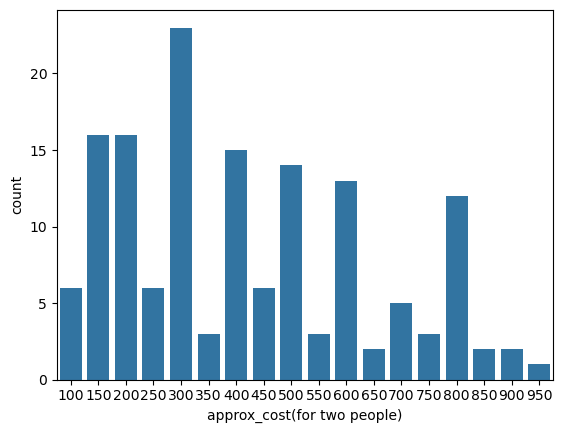

In [95]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)


#Conclusion:- The majority of couples prefer restaurant with an approx cost of 300 rupees

#Q5. Which mode(online or offline) has received the maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

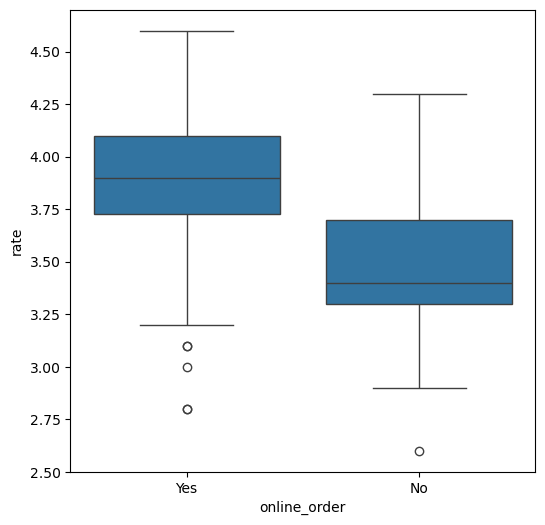

In [101]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe)

# Conclusion:- Online mode has recieved maximum rating(i.e. between 3.75 to 4.25)

# Q6. Which type of restaurant received more offline orders, so that Zomato can provide customers with some good offers?

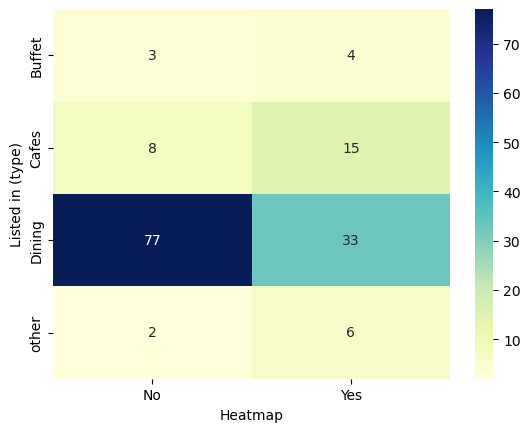

In [107]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.xlabel("Heatmap")
plt.ylabel("Listed in (type)")
plt.show()

#Conclusion:- Dining restaurant primarily accept offline orders, whereas cafe primarily receive online orders. This suggests that clunts preferred order in person at restaurant but prefer online ordering at cafes.